In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn import model_selection as ms
from sklearn import datasets
import time
import graphviz
import pydot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Problem 1
Use scikit learn's decision tree classifier  to predict survival for the titanic dataset (use an 80-20 train-test split).  Experiment with `max_depth` in range(2,10) and `min_samples_leaf` in range(1,102,10) and compare training time and prediction accuracy.  Use the `graphviz` module to draw your most accurate `max_depth=3` tree.  Interpret the results.

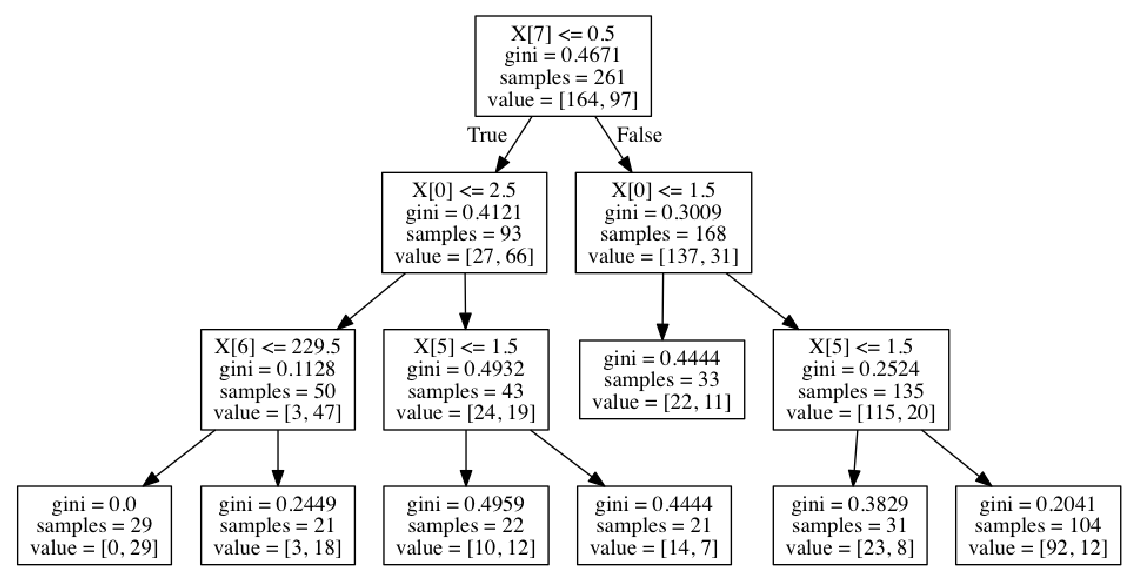

In [2]:
# Import dataset.
titanic = pd.read_csv('titanic.csv', header=0)
titanic.dropna(axis=0, subset=['Survived'], inplace=True)
titanic['Age'].fillna(value=np.int(titanic['Age'].mean()), inplace=True)
titanic['Fare'].fillna(value=titanic['Age'].mean(), inplace=True)
# Creating categorical variables for Embarked, Sex, and home.dest then prep data
#titanic = pd.get_dummies(titanic, columns=['Embarked', 'Sex'])
titanic['Embarked'] = titanic['Embarked'].astype('category').cat.codes
titanic['Male'] = (titanic['Sex']=='male').astype(np.int)
titanic['home.dest'] = titanic['home.dest'].astype('category').cat.codes
y = titanic.Survived
titanic.drop(['Survived','Name','Cabin', 'Sex', 'Boat', 'Body','Ticket'], axis=1, inplace=True)

# Test train split.
xtrain, xtest, ytrain, ytest = ms.train_test_split(titanic, y, train_size=.2)

# Experiment with max_depth and min_samples_leaf
accuracy = []
for depth in range(2,10):
    for min_samples in range(1,102,10):
        Tree = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = min_samples)
        start = time.clock()
        Tree.fit(xtrain, ytrain)
        accuracy.append([depth, min_samples, time.clock() - start, Tree.score(xtest, ytest)])
depth_3 = accuracy[10:20]
depth_3 = sorted(depth_3, key = lambda x:x[-1], reverse=True)
# accuracy = sorted(accuracy, key = lambda x:x[-1], reverse=True)
accuracy = np.array(accuracy)

# Export to GraphViz
best_3 = DecisionTreeClassifier(max_depth=depth_3[0][0], min_samples_leaf=depth_3[0][1])
best_3.fit(xtrain, ytrain)

tree.export_graphviz(best_3, out_file='tree.dot')
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

plt.figure(figsize=(20, 20))
img = plt.imread('tree.png')
plt.imshow(img)
plt.yticks([])
plt.xticks([])
plt.show()

# Analyze results

In [3]:
accuracy = sorted(accuracy, key = lambda x:x[-1], reverse=True)
accuracy = pd.DataFrame(accuracy, columns=['MaxDepth','MinSamplesPerLeaf', 'Time', 'Accuracy'])
accuracy.describe()

,MaxDepth,MinSamplesPerLeaf,Time,Accuracy
count,88.000000,88.000000,88.000000,88.000000
mean,5.500000,51.000000,0.000619,0.763793
std,2.304419,31.803997,0.000225,0.048357
min,2.000000,1.000000,0.000451,0.616412
25%,3.750000,21.000000,0.000494,0.779342
50%,5.500000,51.000000,0.000570,0.780534
75%,7.250000,81.000000,0.000661,0.780534
max,9.000000,101.000000,0.002208,0.799618


In [4]:
# show 10 best trees
accuracy.head(10)

,MaxDepth,MinSamplesPerLeaf,Time,Accuracy
0,3.0,21.0,0.000663,0.799618
1,4.0,21.0,0.000647,0.799618
2,5.0,21.0,0.000599,0.799618
3,6.0,21.0,0.000606,0.799618
4,7.0,21.0,0.000616,0.799618
5,8.0,21.0,0.000607,0.799618
6,9.0,21.0,0.000719,0.799618
7,3.0,1.0,0.000816,0.786260
8,2.0,51.0,0.000501,0.780534
9,2.0,61.0,0.000494,0.780534


In [5]:
# show 10 worst trees
accuracy.tail(10)

,MaxDepth,MinSamplesPerLeaf,Time,Accuracy
78,9.0,1.0,0.000862,0.729962
79,8.0,1.0,0.000792,0.708969
80,2.0,101.0,0.000452,0.616412
81,3.0,101.0,0.000474,0.616412
82,4.0,101.0,0.000502,0.616412
83,5.0,101.0,0.000454,0.616412
84,6.0,101.0,0.000493,0.616412
85,7.0,101.0,0.000451,0.616412
86,8.0,101.0,0.000533,0.616412
87,9.0,101.0,0.000594,0.616412


# Problem 2
Do the same thing as #1, but on a large dataset related to your final project. 

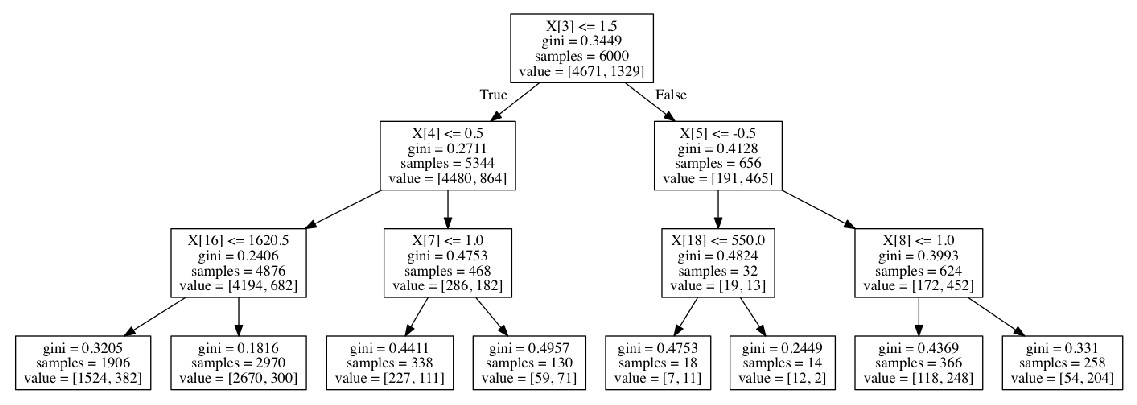

In [7]:
# Import dataset.
default = pd.read_csv("default.csv")
y = default['default']
X = default.drop(['default'], axis=1)

# Test train split.
xtrain, xtest, ytrain, ytest = ms.train_test_split(X, y, train_size=.2)

# Experiment with max_depth and min_samples_leaf
accuracy = []
for depth in range(2,10):
    for min_samples in range(1,102,10):
        Tree = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = min_samples)
        start = time.clock()
        Tree.fit(xtrain, ytrain)
        accuracy.append([depth, min_samples, time.clock() - start, Tree.score(xtest, ytest)])
depth_3 = accuracy[10:20]
depth_3 = sorted(depth_3, key = lambda x:x[-1], reverse=True)
# accuracy = sorted(accuracy, key = lambda x:x[-1], reverse=True)
accuracy = np.array(accuracy)

# Use graphviz module
best_3 = DecisionTreeClassifier(max_depth=depth_3[0][0], min_samples_leaf=depth_3[0][1])
best_3.fit(xtrain, ytrain)

tree.export_graphviz(best_3, out_file='tree.dot')
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

plt.figure(figsize=(20, 20))
img = plt.imread('tree.png')
plt.imshow(img)
plt.yticks([])
plt.xticks([])
plt.show()

# Analyze results

In [8]:
accuracy = sorted(accuracy, key = lambda x:x[-1], reverse=True)
accuracy = pd.DataFrame(accuracy, columns=['MaxDepth','MinSamplesPerLeaf', 'Time', 'Accuracy'])
accuracy.describe()

,MaxDepth,MinSamplesPerLeaf,Time,Accuracy
count,88.000000,88.000000,88.000000,88.000000
mean,5.500000,51.000000,0.044454,0.816294
std,2.304419,31.803997,0.016434,0.004345
min,2.000000,1.000000,0.016237,0.798500
25%,3.750000,21.000000,0.029900,0.814750
50%,5.500000,51.000000,0.045687,0.818417
75%,7.250000,81.000000,0.059526,0.819083
max,9.000000,101.000000,0.073436,0.819708


In [9]:
# Show 10 best trees
accuracy.head(10)

,MaxDepth,MinSamplesPerLeaf,Time,Accuracy
0,3.0,11.0,0.026382,0.819708
1,4.0,21.0,0.037041,0.819708
2,4.0,31.0,0.035038,0.819708
3,4.0,61.0,0.030082,0.819708
4,3.0,21.0,0.024174,0.819500
5,3.0,31.0,0.024585,0.819500
6,4.0,1.0,0.039864,0.819417
7,3.0,1.0,0.024344,0.819250
8,3.0,61.0,0.024752,0.819083
9,3.0,71.0,0.026788,0.819083


In [10]:
# Show 10 worst trees
accuracy.tail(10)

,MaxDepth,MinSamplesPerLeaf,Time,Accuracy
78,8.0,41.0,0.060166,0.810708
79,7.0,1.0,0.057423,0.810083
80,7.0,11.0,0.056231,0.809583
81,8.0,21.0,0.065491,0.809292
82,8.0,11.0,0.064544,0.809250
83,9.0,41.0,0.063298,0.807375
84,8.0,1.0,0.069724,0.806708
85,9.0,11.0,0.071141,0.802333
86,9.0,21.0,0.071326,0.801000
87,9.0,1.0,0.073250,0.798500


# Problem 3
Use scikit-learn's tree regression on the boston housing dataset to predict housing prices (with 3-fold cross validation). Experiment with `max_depth` in range(2,10) and `min_samples_leaf` in range(1,102,10) and compare training time and prediction accuracy.  Use the `graphviz` module to draw your most accurate `max_depth=3` tree.  Interpret the results.

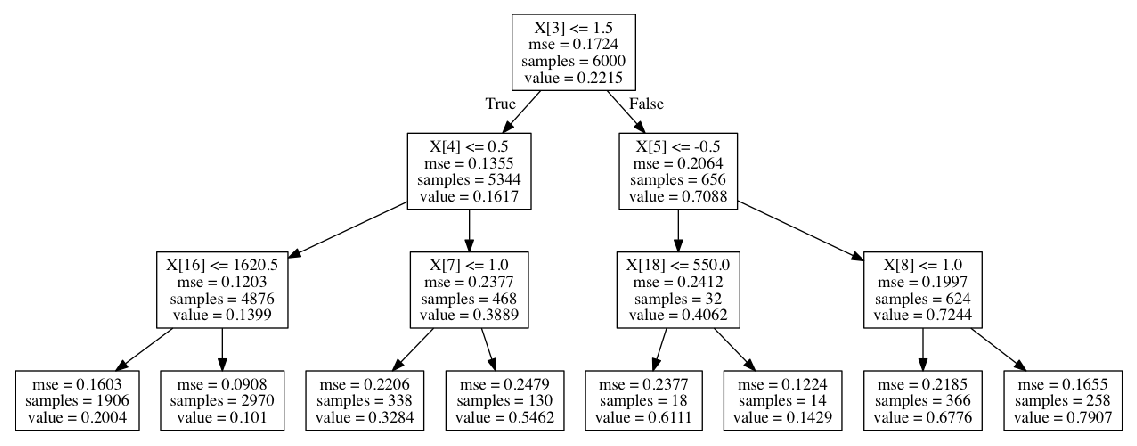

In [11]:
# Import datset.
boston = datasets.load_boston()
X,y = boston.data, boston.target

# Experiment with max_depth and min_samples_leaf.
accuracy = []
for depth in range(2,10):
    for min_samples in range(1,102,10):
        Tree = DecisionTreeRegressor(max_depth = depth, min_samples_leaf = min_samples)
        start = time.clock()
        score = ms.cross_val_score(Tree, X, y, scoring='neg_mean_squared_error')
        accuracy.append([depth, min_samples, time.clock() - start, score.mean()])
depth_3 = accuracy[10:20]
depth_3 = sorted(depth_3, key = lambda x:x[-1], reverse=True)
# accuracy = sorted(accuracy, key = lambda x:x[-1], reverse=True)
accuracy = np.array(accuracy)

# Use graphviz module
best_3 = DecisionTreeRegressor(max_depth=depth_3[0][0], min_samples_leaf=depth_3[0][1])
best_3.fit(xtrain, ytrain)

tree.export_graphviz(best_3, out_file='tree.dot')
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

plt.figure(figsize=(20, 20))
img = plt.imread('tree.png')
plt.imshow(img)
plt.yticks([])
plt.xticks([])
plt.show()

# Analyze results

In [16]:
accuracy = sorted(accuracy, key = lambda x:x[-1], reverse=True)
accuracy = pd.DataFrame(accuracy, columns=['MaxDepth','MinSamplesPerLeaf', 'Time', 'Loss'])
accuracy.describe()

ValueError: Shape of passed values is (1, 4), indices imply (4, 4)

In [ ]:
# Show 10 best trees
accuracy.head(10)

In [ ]:
# Show 10 worst trees
accuracy.tail(10)

# Problem 4
Do the same thing as #3, but on a large dataset related to your final project. 

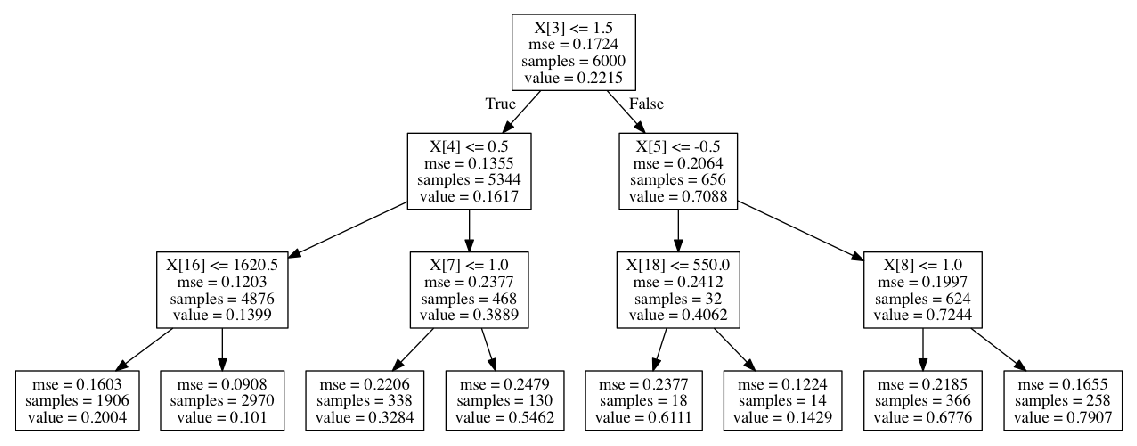

In [12]:
# Import datset.
housing = pd.read_csv('ahs_clean.csv')
housing['VALUE'] = np.exp(housing['LOGVALUE'])
y = housing['VALUE']
X = housing.drop(['LOGVALUE','VALUE'], axis=1)

# Experiment with max_depth and min_samples_leaf.
accuracy = []
for depth in range(2,10):
    for min_samples in range(1,102,10):
        Tree = DecisionTreeRegressor(max_depth = depth, min_samples_leaf = min_samples)
        start = time.clock()
        score = ms.cross_val_score(Tree, X, y, scoring='neg_mean_squared_error')
        accuracy.append([depth, min_samples, time.clock() - start, score.mean()])
depth_3 = accuracy[10:20]
depth_3 = sorted(depth_3, key = lambda x:x[-1], reverse=True)
# accuracy = sorted(accuracy, key = lambda x:x[-1], reverse=True)
accuracy = np.array(accuracy)

# Use graphviz module
best_3 = DecisionTreeRegressor(max_depth=depth_3[0][0], min_samples_leaf=depth_3[0][1])
best_3.fit(xtrain, ytrain)

tree.export_graphviz(best_3, out_file='tree.dot')
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

plt.figure(figsize=(20, 20))
img = plt.imread('tree.png')
plt.imshow(img)
plt.yticks([])
plt.xticks([])
plt.show()

# Analyze results

In [13]:
accuracy = sorted(accuracy, key = lambda x:x[-1], reverse=True)
accuracy = pd.DataFrame(accuracy, columns=['MaxDepth','MinSamplesPerLeaf', 'Time', 'Loss'])
accuracy.describe()

,MaxDepth,MinSamplesPerLeaf,Time,Loss
count,88.000000,88.000000,88.000000,8.800000e+01
mean,5.500000,51.000000,1.489861,-7.535874e+10
std,2.304419,31.803997,0.472224,4.519568e+09
min,2.000000,1.000000,0.746983,-8.686888e+10
25%,3.750000,21.000000,1.092436,-7.678860e+10
50%,5.500000,51.000000,1.514991,-7.373562e+10
75%,7.250000,81.000000,1.899169,-7.218144e+10
max,9.000000,101.000000,2.293587,-7.125057e+10


In [14]:
# show best 10 trees
accuracy.head(10)

,MaxDepth,MinSamplesPerLeaf,Time,Loss
0,7.0,51.0,1.881040,-7.125057e+10
1,8.0,51.0,2.079179,-7.162016e+10
2,8.0,31.0,1.982503,-7.175701e+10
3,7.0,41.0,1.802060,-7.178616e+10
4,7.0,21.0,1.730378,-7.182093e+10
5,9.0,51.0,2.195872,-7.183357e+10
6,7.0,31.0,1.759754,-7.189032e+10
7,8.0,61.0,2.115416,-7.190484e+10
8,9.0,31.0,2.211900,-7.190713e+10
9,8.0,41.0,1.980089,-7.191467e+10


In [15]:
# show worst 10 trees
accuracy.tail(10)

,MaxDepth,MinSamplesPerLeaf,Time,Loss
78,2.0,51.0,0.836743,-8.561067e+10
79,2.0,91.0,0.746983,-8.561067e+10
80,2.0,1.0,0.854124,-8.561067e+10
81,2.0,11.0,0.759369,-8.561067e+10
82,2.0,21.0,0.804322,-8.561067e+10
83,2.0,71.0,0.760079,-8.561067e+10
84,2.0,81.0,0.751783,-8.561067e+10
85,2.0,101.0,0.747195,-8.561067e+10
86,2.0,61.0,0.789173,-8.561067e+10
87,9.0,1.0,2.293587,-8.686888e+10
